# Analysis

In [51]:
from pyvis.network import Network
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import json

In [2]:
card_graph = {}
with open ('./data/top_10k_player_decks.json') as file:
    card_graph = json.load(file)

In [3]:
card_occurances = {k: v for k,v in card_graph.items()}
# (v['occurances'])
# card_occurances
# occurannces
# edges

In [4]:
edges = pd.DataFrame(
    {
        "source": [e for k,v in card_occurances.items() for e,w in v['edges'].items()],
        "target": [k for k,v in card_occurances.items() for e,w in v['edges'].items()],
        "weight": [w for k,v in card_occurances.items() for e,w in v['edges'].items()],
        # "color": ["red", "blue", "blue"],
    }
)

G = nx.from_pandas_edgelist(edges,
source='source',
target='target',
edge_attr='weight')

G

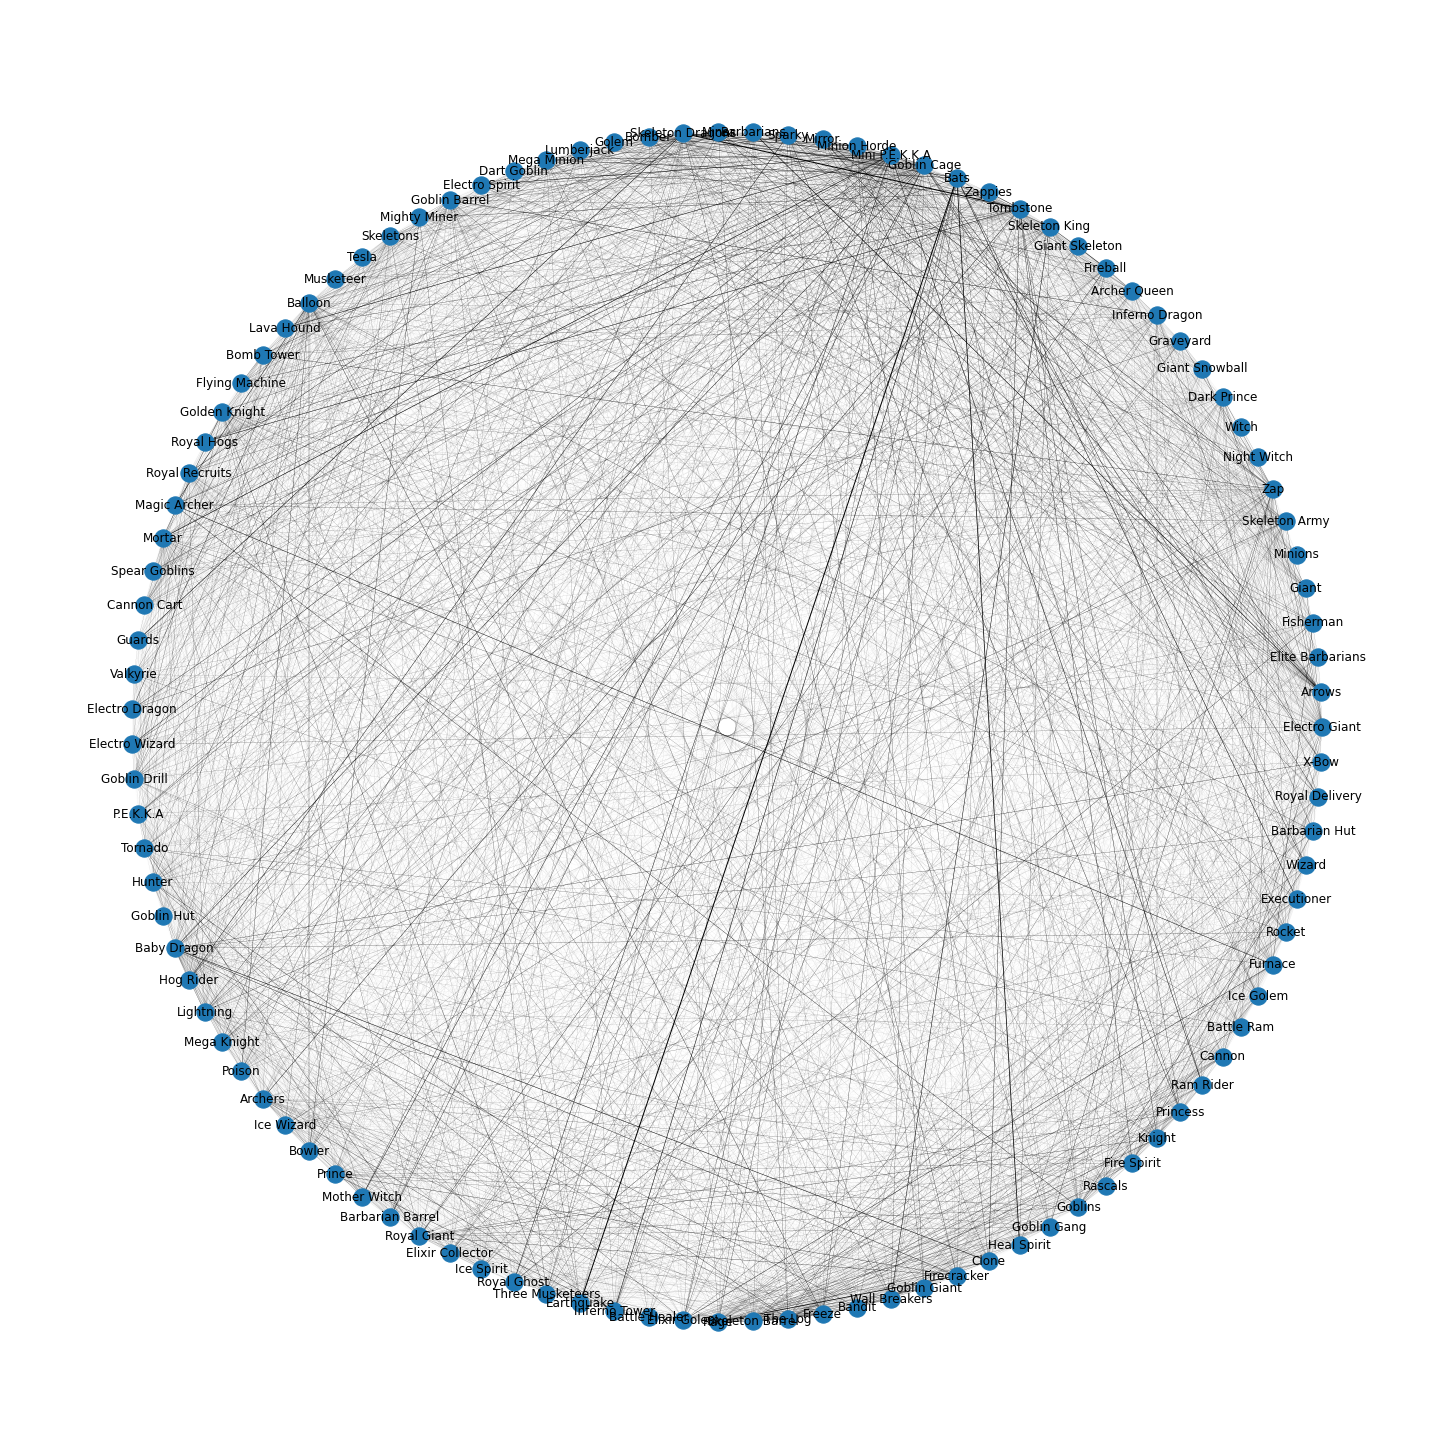

In [5]:
import matplotlib.pylab as pl
import numpy as np
pl.figure(figsize=(20,20))

# G = nx.complete_graph(5)
# wts = np.log(edges.weight / max(edges.weight))

wts = edges.weight
nx.draw_circular(G, width=(wts/max(wts)), with_labels=True)

In [6]:
# card_occurances = {k: v for k,v in card_graph.items()}

# filtered_occurances = {}
# for k,v in card_occurances.items():
#     if k != ['Barbarian Hut'] and k != ['Goblin Hut']:
#         filtered_occurances[k] = v
#     elif 'Barbarian Hut' not in v.keys() and 'Goblin Hut' not in v.keys():
#         filtered_occurances[k] = v
#     else:
#         new_v = {}
#         for card in v.keys():
#             if card != ['Barbarian Hut'] and card != ['Goblin Hut']:
#                 new_v[card] = v[card]
#         filtered_occurances[k] = new_v

# filtered_edges = pd.DataFrame(
#     {
#         "source": [e for k,v in filtered_occurances.items() for e,w in v['edges'].items()],
#         "target": [k for k,v in filtered_occurances.items() for e,w in v['edges'].items()],
#         "weight": [w for k,v in filtered_occurances.items() for e,w in v['edges'].items()],
#         # "color": ["red", "blue", "blue"],
#     }
# )

# G_filtered = nx.from_pandas_edgelist(filtered_edges,
# source='source',
# target='target',
# edge_attr='weight')

# pl.figure(figsize=(20,20))
# nx.draw_spectral(G_filtered, width=(wts/max(wts)), with_labels=True)



In [7]:
adj = pd.read_csv('./data/top_10k_player_decks_adj_matrix.csv')
adj.index = adj['Unnamed: 0'].values
adj = adj.drop(['Unnamed: 0'], axis=1)
adj

Archer Queen  Archers  Arrows  Baby Dragon  Balloon  Bandit  \
Archer Queen             0        1     167           37       31     178   
Archers                  1        0      68            7       13       4   
Arrows                 167       68       0          141      322      65   
Baby Dragon             37        7     141            0      217      68   
Balloon                 31       13     322          217        0      14   
...                    ...      ...     ...          ...      ...     ...   
Witch                    0        0     150            4       13       3   
Wizard                   0        0      13            1       16       5   
X-Bow                  196      278       0            1        0       3   
Zap                    147       41     739          148      626     613   
Zappies                 50        1     571           60       18      14   

              Barbarian Barrel  Barbarian Hut  Barbarians  Bats  ...  \
Archer Queen               142              0          35   163  ...   
Archers                     30              1           8    31  ...   
Arrows                     205              3         273   488  ...   
Baby Dragon               1088             51          49   177  ...   
Balloon                    395              2         296   144  ...   
...                        ...            ...         ...   ...  ...   
Witch                        8              0           8    52  ...   
Wizard                       2              0          18    14  ...   
X-Bow                        2              1          13     8  ...   
Zap                        127              2         344   683  ...   
Zappies                    298              2          33    37  ...   

              Three Musketeers  Tombstone  Tornado  Valkyrie  Wall Breakers  \
Archer Queen                12         41      372       396             66   
Archers                      0         38       82       132              4   
Arrows                      18        511       92       225             54   
Baby Dragon                  2        561     1483       220              0   
Balloon                      0        356      477       163              1   
...                        ...        ...      ...       ...            ...   
Witch                        0         11       31        11              2   
Wizard                       2          3       32        11              1   
X-Bow                        0          1      134       125              0   
Zap                        188        352      335       143            177   
Zappies                      8        440      265       110              5   

              Witch  Wizard  X-Bow  Zap  Zappies  
Archer Queen      0       0    196  147       50  
Archers           0       0    278   41        1  
Arrows          150      13      0  739      571  
Baby Dragon       4       1      1  148       60  
Balloon          13      16      0  626       18  
...             ...     ...    ...  ...      ...  
Witch             0       4      0   57       22  
Wizard            4       0      0   42        0  
X-Bow             0       0      0    4        1  
Zap              57      42      4    0       78  
Zappies          22       0      1   78        0  

[107 rows x 107 columns]

In [94]:
df = adj
normalized_df=df/df.sum()
adj = normalized_df
adj

Archer Queen   Archers    Arrows  Baby Dragon   Balloon  \
Archer Queen      0.000000  0.000253  0.009172     0.002672  0.003073   
Archers           0.000070  0.000000  0.003735     0.000506  0.001289   
Arrows            0.011621  0.017224  0.000000     0.010183  0.031922   
Baby Dragon       0.002575  0.001773  0.007744     0.000000  0.021513   
Balloon           0.002157  0.003293  0.017686     0.015672  0.000000   
...                    ...       ...       ...          ...       ...   
Witch             0.000000  0.000000  0.008239     0.000289  0.001289   
Wizard            0.000000  0.000000  0.000714     0.000072  0.001586   
X-Bow             0.013639  0.070415  0.000000     0.000072  0.000000   
Zap               0.010229  0.010385  0.040589     0.010689  0.062060   
Zappies           0.003479  0.000253  0.031362     0.004333  0.001784   

                Bandit  Barbarian Barrel  Barbarian Hut  Barbarians      Bats  \
Archer Queen  0.018228          0.007345       0.000000    0.008375  0.010973   
Archers       0.000410          0.001552       0.002041    0.001914  0.002087   
Arrows        0.006656          0.010603       0.006122    0.065327  0.032853   
Baby Dragon   0.006964          0.056274       0.104082    0.011725  0.011916   
Balloon       0.001434          0.020430       0.004082    0.070830  0.009694   
...                ...               ...            ...         ...       ...   
Witch         0.000307          0.000414       0.000000    0.001914  0.003501   
Wizard        0.000512          0.000103       0.000000    0.004307  0.000943   
X-Bow         0.000307          0.000103       0.002041    0.003111  0.000539   
Zap           0.062775          0.006569       0.004082    0.082316  0.045981   
Zappies       0.001434          0.015413       0.004082    0.007897  0.002491   

              ...  Three Musketeers  Tombstone   Tornado  Valkyrie  \
Archer Queen  ...          0.002394   0.003315  0.010496  0.021412   
Archers       ...          0.000000   0.003072  0.002314  0.007137   
Arrows        ...          0.003591   0.041313  0.002596  0.012166   
Baby Dragon   ...          0.000399   0.045355  0.041844  0.011896   
Balloon       ...          0.000000   0.028782  0.013459  0.008814   
...           ...               ...        ...       ...       ...   
Witch         ...          0.000000   0.000889  0.000875  0.000595   
Wizard        ...          0.000399   0.000243  0.000903  0.000595   
X-Bow         ...          0.000000   0.000081  0.003781  0.006759   
Zap           ...          0.037510   0.028458  0.009452  0.007732   
Zappies       ...          0.001596   0.035573  0.007477  0.005948   

              Wall Breakers     Witch    Wizard     X-Bow       Zap   Zappies  
Archer Queen       0.008351  0.000000  0.000000  0.042813  0.006483  0.004464  
Archers            0.000506  0.000000  0.000000  0.060725  0.001808  0.000089  
Arrows             0.006833  0.096092  0.017687  0.000000  0.032594  0.050982  
Baby Dragon        0.000000  0.002562  0.001361  0.000218  0.006528  0.005357  
Balloon            0.000127  0.008328  0.021769  0.000000  0.027610  0.001607  
...                     ...       ...       ...       ...       ...       ...  
Witch              0.000253  0.000000  0.005442  0.000000  0.002514  0.001964  
Wizard             0.000127  0.002562  0.000000  0.000000  0.001852  0.000000  
X-Bow              0.000000  0.000000  0.000000  0.000000  0.000176  0.000089  
Zap                0.022397  0.036515  0.057143  0.000874  0.000000  0.006964  
Zappies            0.000633  0.014094  0.000000  0.000218  0.003440  0.000000  

[107 rows x 107 columns]

In [89]:
# filtered_adj = adj[adj.index != 'Barbarian Hut']
# filtered_adj = filtered_adj[filtered_adj.index != 'Goblin Hut']
# filtered_adj = filtered_adj.drop(['Barbarian Hut', 'Goblin Hut'], axis=1)

# max(filtered_adj[filtered_adj.columns])

# filtered_adj = filtered_adj/max(filtered_adj.max())

G = nx.from_pandas_adjacency(adj)


In [90]:
G

<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  import inspect


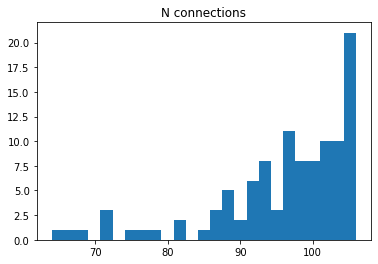

<AxesSubplot:>

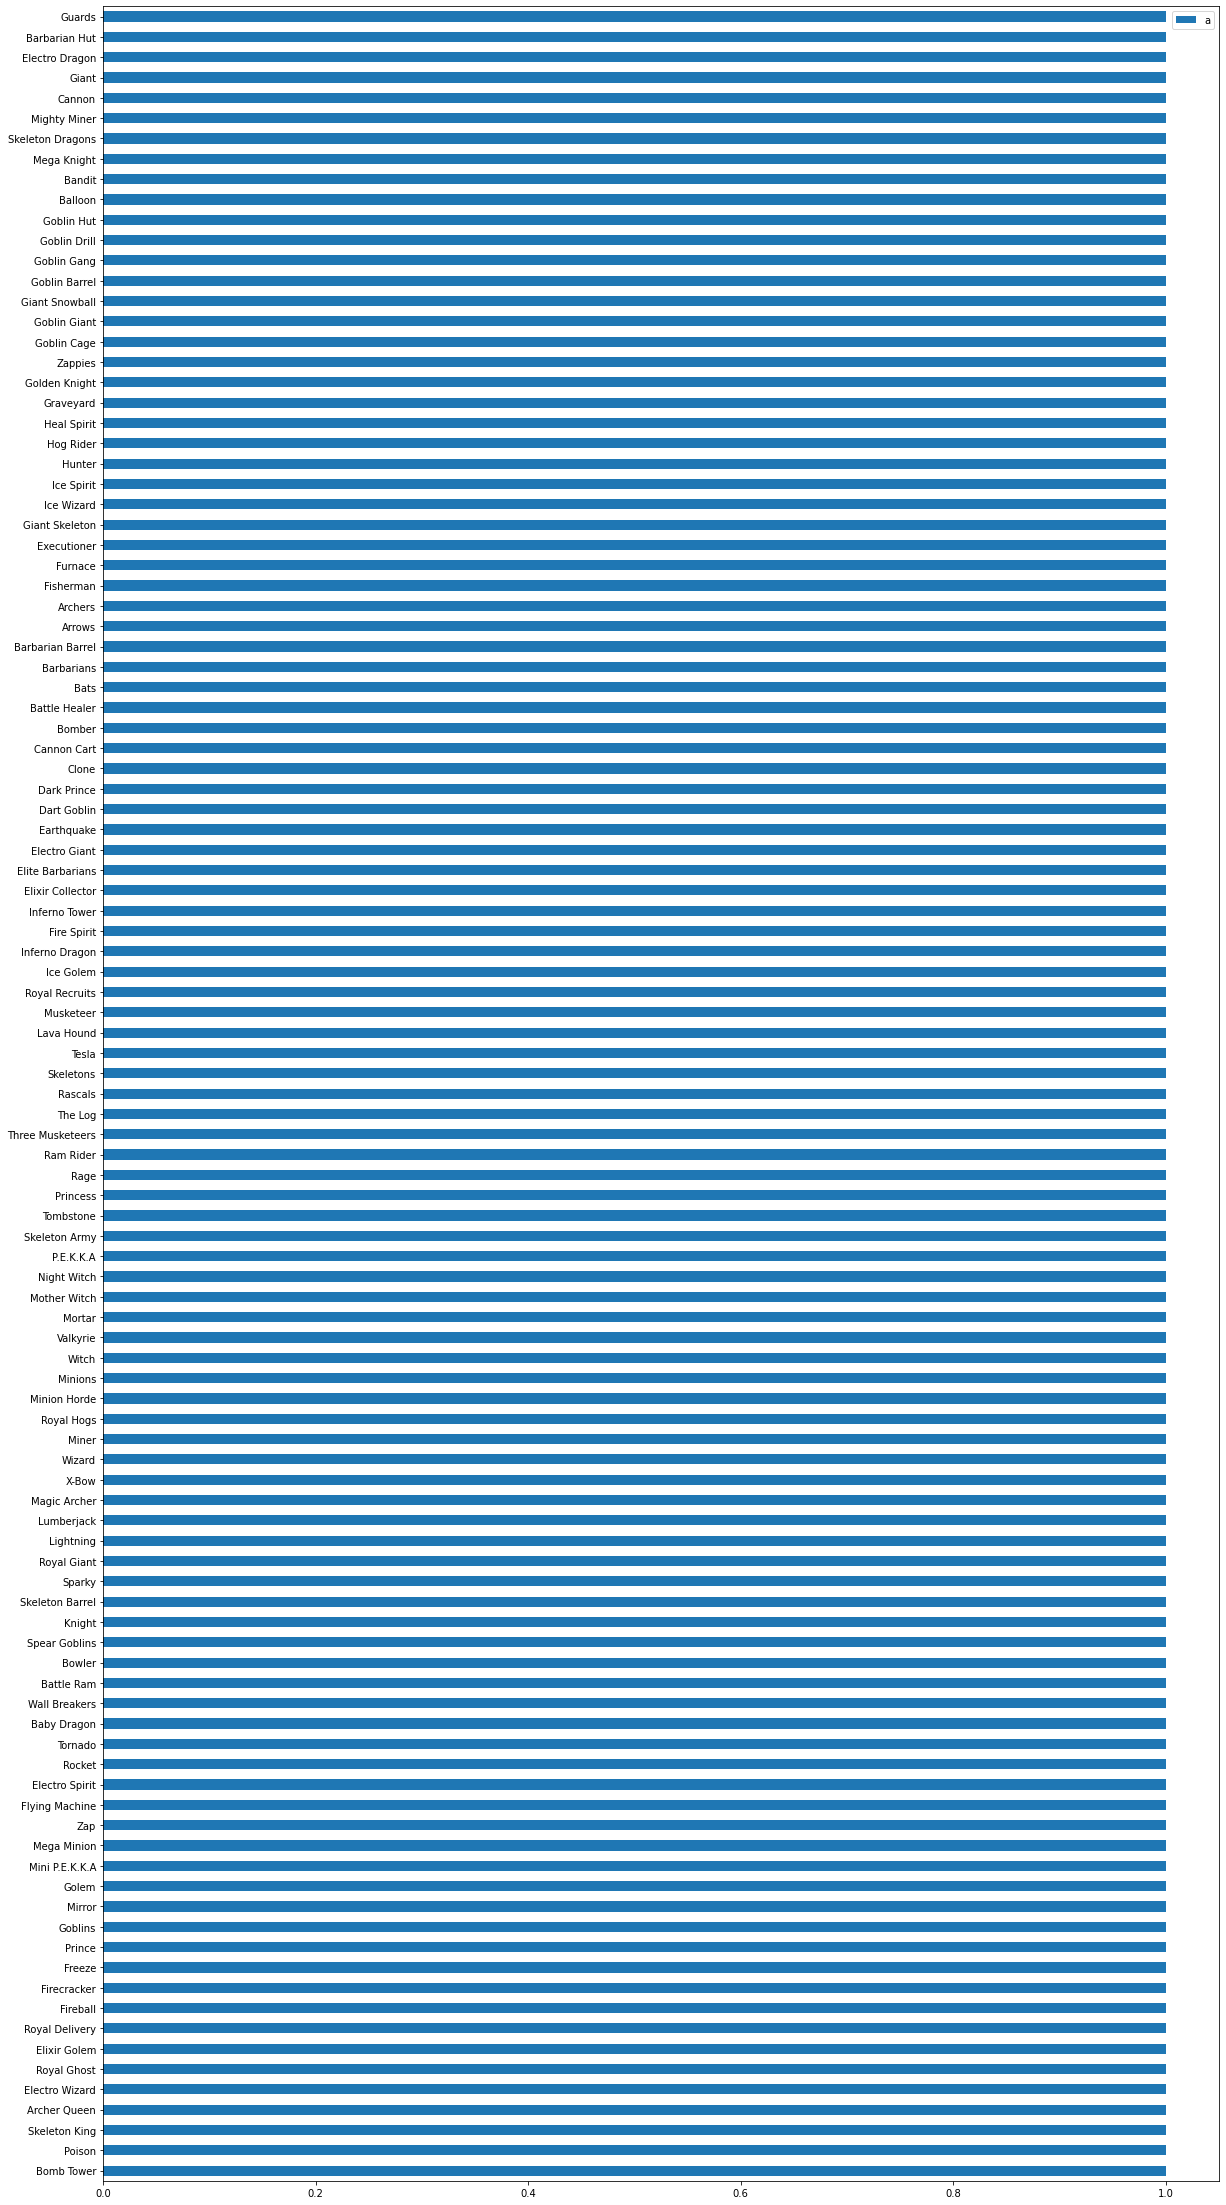

In [91]:


degs = nx.laplacian_matrix(G, weight=None).diagonal()
plt.title('N connections')
plt.hist(degs, bins=25)
plt.show()

# plt.hist()

# adj.sum().hist(column='')
# pd.DataFrame(adj.sum()).hist(column='0')

pd.DataFrame({'a': adj.sum()}).sort_values('a').plot.barh(figsize=(20,40), )

# wts = nx.get_edge_attributes(G,'weight')
# wts = np.asarray(list(wts.values()))
# wts = wts / max(wts)

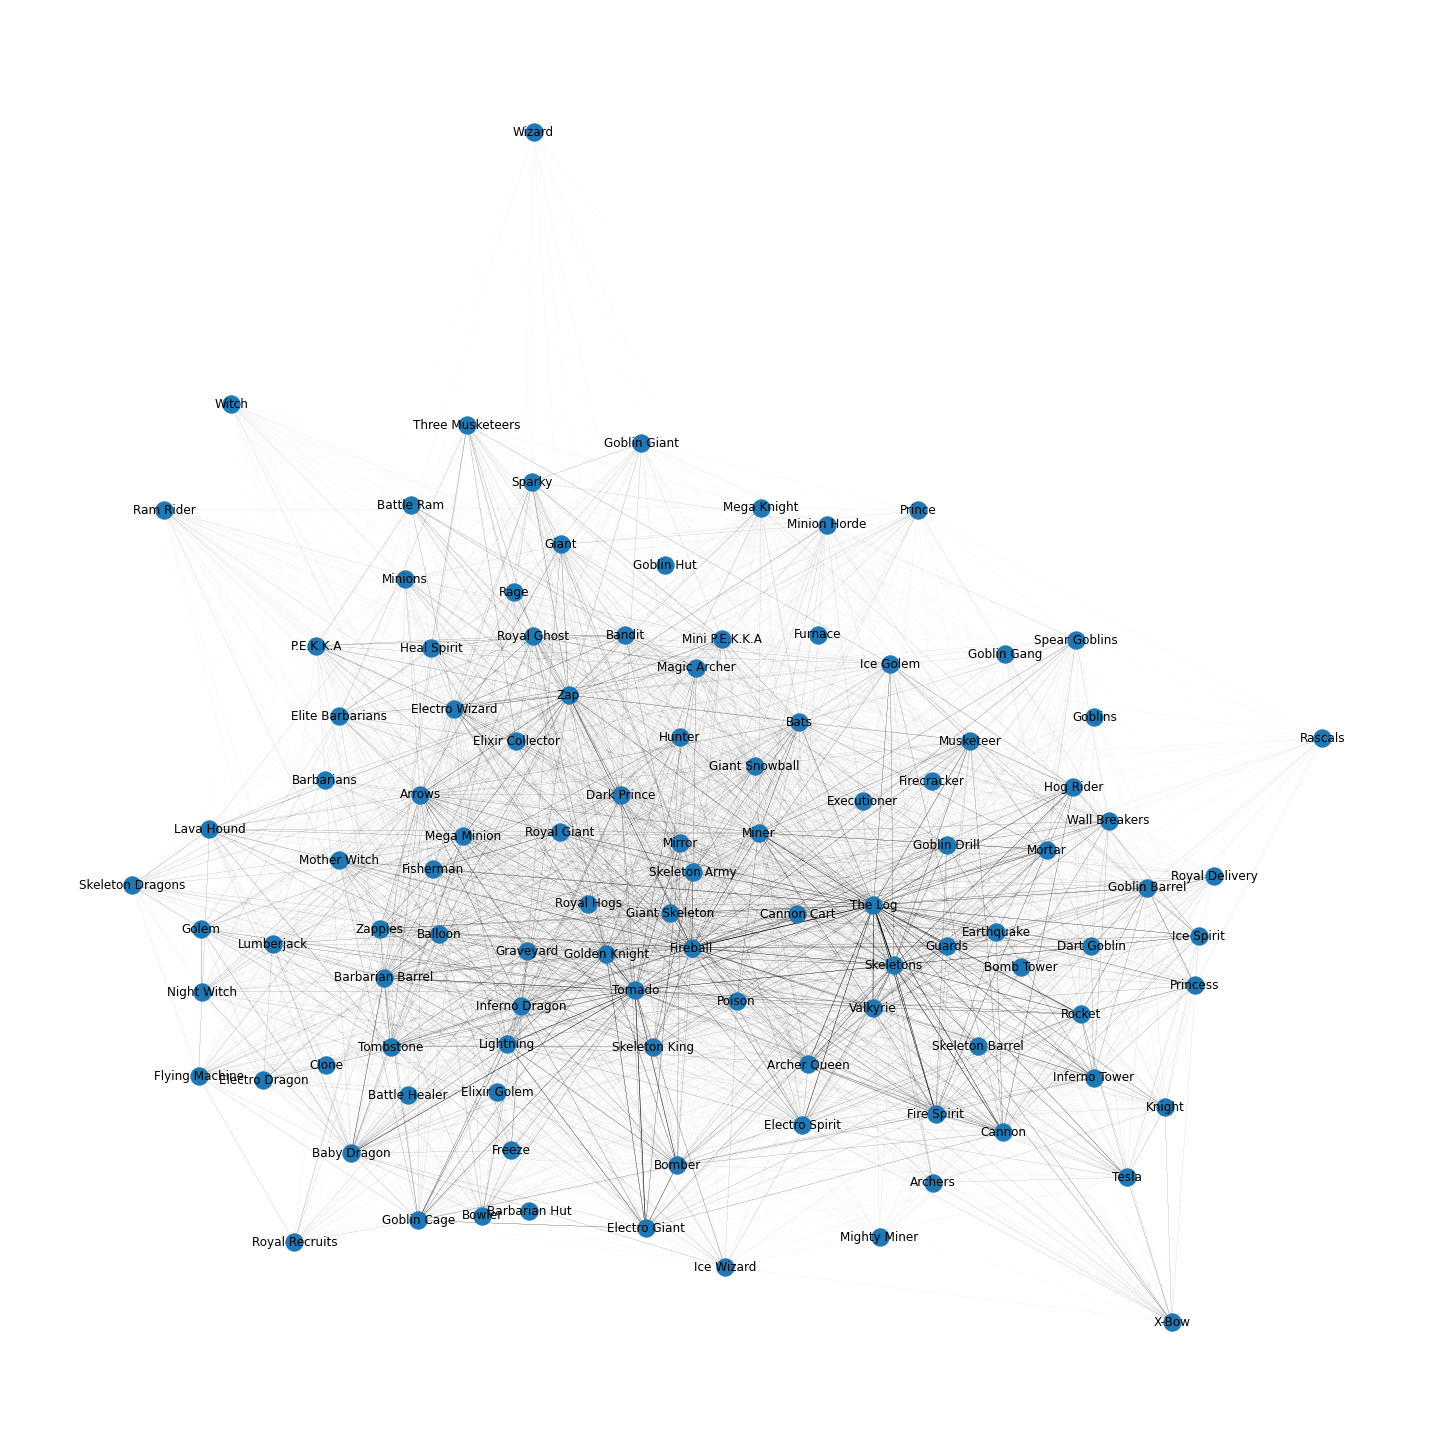

In [92]:
pl.figure(figsize=(20,20))
nx.draw_spring(G, width=(wts/max(wts)), with_labels=True)

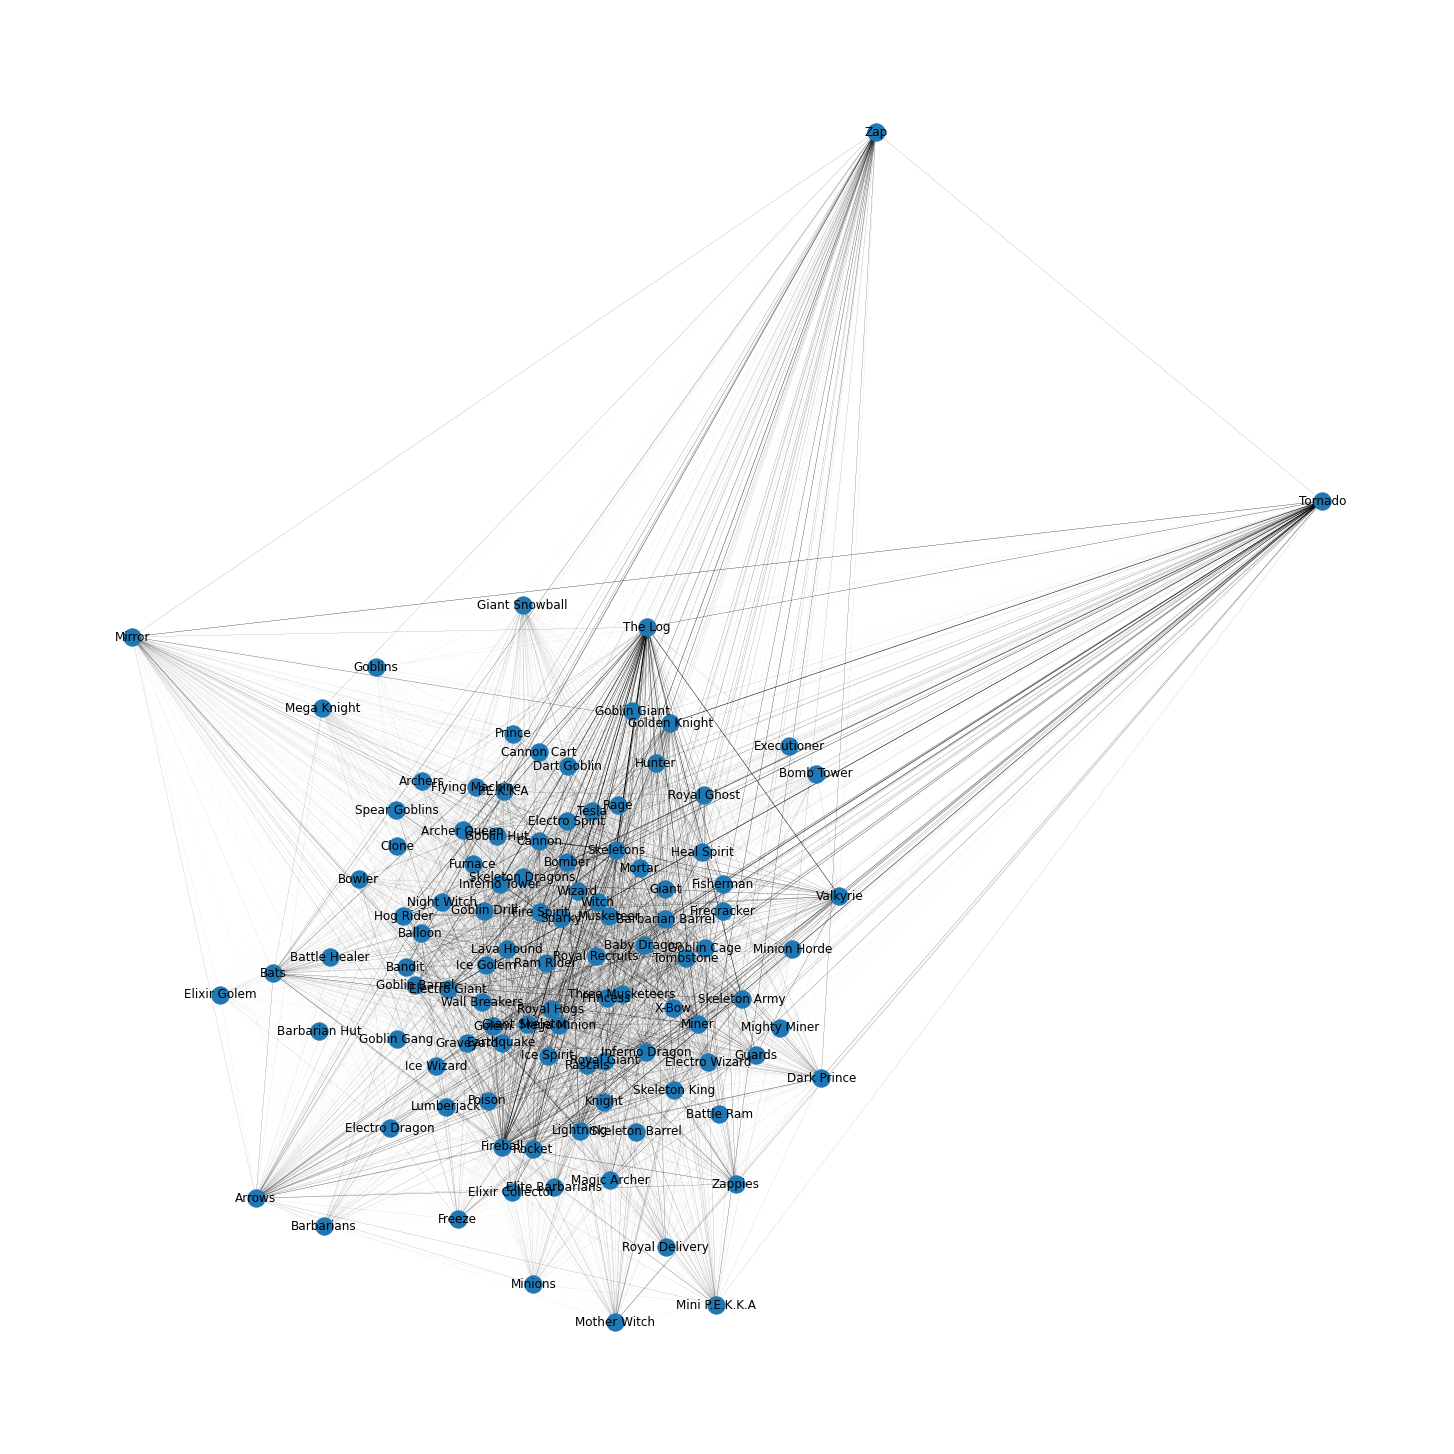

In [93]:
pl.figure(figsize=(20,20))
# nx.draw_kamada_kawai_layout(G, width=wts, with_labels=True)
pos = nx.kamada_kawai_layout(G)
nx.draw(G, width = wts, pos=pos, with_labels=True)